<div class="info">
<b>PROBLEM SHEET 8:</b>    Numerical Methods to solve Ordinary Differential Equations, ODEs

### Standard Header
As we will be utilizing a number of packages with reasonably long names, we will adopt the _de facto_ standard module abbreviations in the following header.  We also ensure that our [division behavior is sensible](http://www.python.org/dev/peps/pep-0238/) by importing from `__future__`:  _i.e._, promotion to `double` will occur from `int` or `long` data types involving division:  `1/2 == 0.5`.  Although this is the default in Python 3, it is a trivial way to help this notebook work in Python 2 if that's what you are using.

In [1]:
#%matplotlib inline 
# this line is required for the plots to appear in the Jupyter cells, rather than launching the matplotlib GUI
%matplotlib widget 
#this allows interactive view but you need to be in classic rather than CoCalc Jupyter notebook for this to work

import matplotlib

import numpy as np

import matplotlib.pyplot as plt

# Let printing work the same in Python 2 and 3
from __future__ import division,print_function

# notice two underscores _ either side of future

## PS8 Ex1: (Marks 6/10)

* a) Run the field simulation.py code, explore how changing the initial conditions and time step, dt, effect the outcome. Note a what time step the Euler method stops working.
* b) The example code is written using lists and scalars, modify/re-write the code so that initial conditions are stored in arrays and that the force is calculated using a function.
* c) Modify the field simulation.py code to use a 4th order Runge-Kutta method, plot and compare with the Euler’s method result. Try increasing the total time interval to see how the errors vary with time. This can be done with either the initial code, or by modifying your answer to part b).


The Runge-Kutta method is discussed in most books on differential equations, a complete description can be found in Numerical Recipes, The Art of Scientific Computing, Cambridge
University Press, 3rd. Edition (2007), W.H.Press, S.A.Teukolsky, W.T. Vetterling, B.P.Flannery. Although this book is not written for Python users it contains many good descriptions of the underlying methods that are common regardless of language.


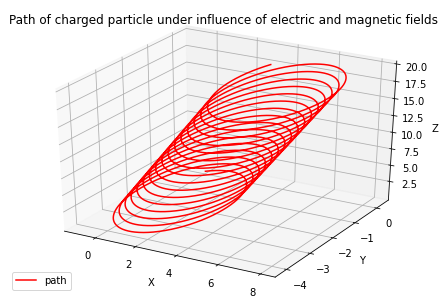

In [19]:
#field simulation.py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    
"""
The following example traces the movement of a charged particle under the influence of electric and
magnetic fields using Euler's Method. You can edit the program to change the components of the fields to see their effect on
the trajectory.
"""

# Define class for initial conditions 
class initial_conditions:
    def __init__(self, E, B, p, v):
        self.E = E
        self.B = B
        self.p = p
        self.v = v

i_x = initial_conditions(0.0, 0.0, 0.0, 20.0)
i_y = initial_conditions(2.0, 0.0, 0.0, 10.0)
i_z = initial_conditions(0.0, 4.0, 0.0, 2.0)

m = 2.0
q = 5.0
t = 0.0

a = []
b = []
c = []

dt = 0.001 # time step (what happens if you increase this to 0.01?)
h = dt
# dt = 0.03

def Ax(): return q * (i_x.E + (i_y.v * i_z.B) - (i_z.v * i_y.B) )/m
def Ay(): return q * (i_y.E - (i_x.v * i_z.B) + (i_z.v * i_x.B) )/m
def Az(): return q * (i_z.E + (i_x.v * i_y.B) - (i_y.v * i_x.B) )/m

def f(x, xd, t): return x + (xd * t)

while t < 10: # trace path until time reaches value e.g. 10
    
    k1 = h*f(i_x.p, i_x.v, h)
    k2 = h*f()
    
    
    
    i_x.p = f(i_x.p, i_x.v, dt)
    i_y.p = f(i_y.p, i_y.v, dt) # updates 'y' at (t+dt)
    i_z.p = f(i_z.p, i_z.v, dt) # updates 'z' at (t+dt)
    
    # Calculate next step using euler
    i_x.v = f(i_x.v, Ax(i_y.v, i_z.v), dt)
    i_y.v = f(i_y.v, Ay(), dt)
    i_z.v = f(i_z.v, Az(), dt)
    
    a.append(i_x.p) # appending a list of x for plot
    b.append(i_y.p)
    c.append(i_z.p)
    t += dt # increment time

fig=plt.figure()
ax = Axes3D(fig)
ax.set_title("Path of charged particle under influence of electric and magnetic fields")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot3D(a,b,c, color='red', label='path') #  creates 3-axis plot
ax.legend(loc='lower left')
 
plt.show()

a) Euler method begins to deteriorate at around dt=0.03

## PS8 Ex2: (Marks 4/10)

Following the example from the lecture use *scipy.integrate.odeint* to solve the following set of nonlinear ODEs.
$$\frac{dx}{dt}=a(y-x),$$
$$\frac{dy}{dt}=(c-a)x-xz+cy,$$
$$\frac{dz}{dt}=xy-bz$$

For the initial conditions use:
* $x_0 = -10$, $y_0 = 0$, $z_0 = 35$

* For initial parameters $a=40$, $b=5$, $c=5$ show that this produces chaotic solutions by plotting $x$ versus $t$, $y$ versus $t$, $z$ versus $t$, $x$ versus $y$, $y$ versus $z$ and $z$ versus $x$. For $t$ plot from 0-10 with a *small enougfh* time-step.
* Repeat with $a=40$, $b=10$, $c=5$, are the solutions still chaotic.

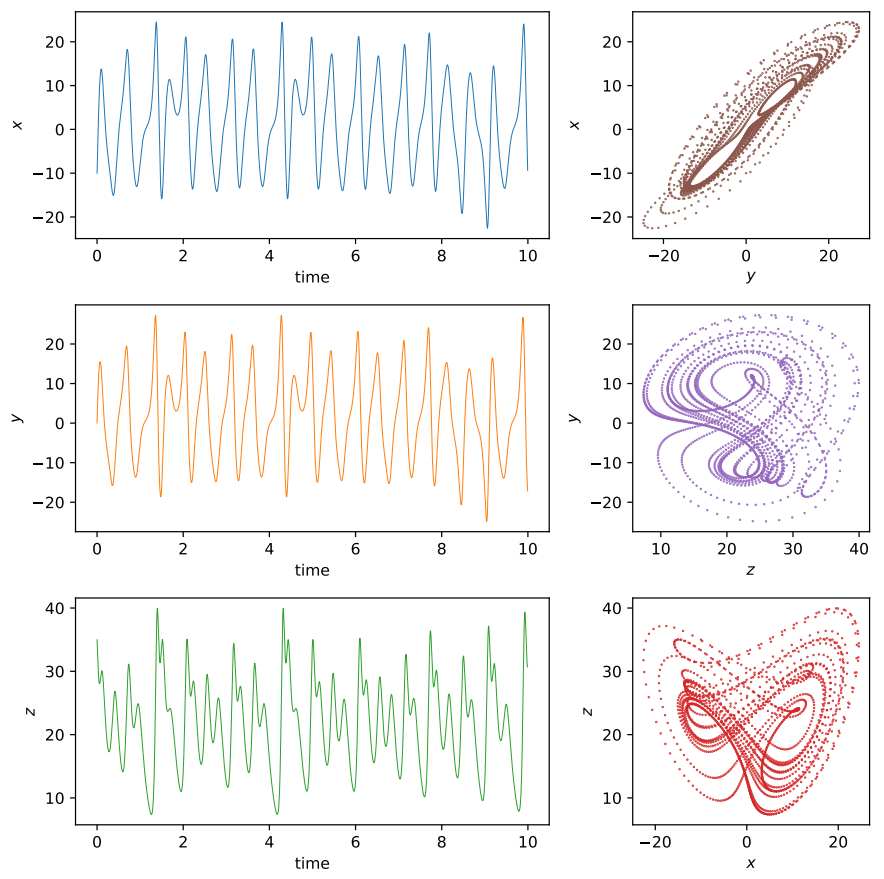

In [ ]:
#ignore this, it's something that helps styling the notebook.
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()